In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




**Indicadores de Educação - Dataset:**

In [2]:
data = pd.read_csv("/content/Education Indicators 2014.csv")
data.head()

,Country Name,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
0,Albania,2893654,1.321986e+10,0.73,7097,333291,195720,16.10,77.83,5
1,Arab World,384222592,2.889750e+12,6.42,6827541,30972246,45126932,11.52,70.57,6
2,United Arab Emirates,9086139,4.019580e+11,0.22,14611,411040,409776,3.60,77.37,5
3,Azerbaijan,9535079,7.519801e+10,0.16,22821,949294,517708,5.20,70.76,4
4,Burundi,10816860,3.093647e+09,24.25,69246,583308,2046794,6.90,56.69,6


In [3]:
# Verificando se não há valores nulos:

data.isna().sum()

Country Name    0
PPT             0
GDP             0
PRPE            0
OOCP            0
ESE             0
EPE             0
UNEMP           0
LEB             0
TDP             0
dtype: int64

**Indicadores usados:**

*  GDP
* Out-of-school children of Primary School (OOCP)
* Enrolment in Secondary Education (ESE)
* Enrolment in Primary Education (EPE)
* Unemployment (UNENMP)
* Theoretical Duration of Primary Education (TDP)

In [4]:
df = data[["Country Name", "GDP", "OOCP", "ESE", "EPE"]]
df

,Country Name,GDP,OOCP,ESE,EPE
0,Albania,1.321986e+10,7097,333291,195720
1,Arab World,2.889750e+12,6827541,30972246,45126932
2,United Arab Emirates,4.019580e+11,14611,411040,409776
3,Azerbaijan,7.519801e+10,22821,949294,517708
4,Burundi,3.093647e+09,69246,583308,2046794
...,...,...,...,...,...
102,Saharan Africa(IDA),1.770710e+12,34134436,56136952,158234432
103,Ukraine,1.335030e+11,56464,2713646,1685030
104,Upper middle income,2.202420e+13,8831078,201880784,206630624
105,West Bank and Gaza,1.271560e+10,32849,709226,442476


In [5]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-5-8c873fd1a489>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,GDP,OOCP,ESE,EPE
GDP,1.000000,0.487069,0.763477,0.693764
OOCP,0.487069,1.000000,0.783963,0.885149
ESE,0.763477,0.783963,1.000000,0.980488
EPE,0.693764,0.885149,0.980488,1.000000


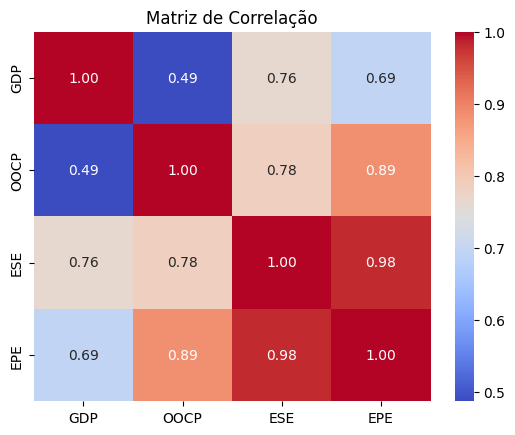

In [6]:
# Visualizar a matriz de correlação usando um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Buscando a correlação de tais índices com a taxa de desemprego:**

In [7]:
# Criando um dataframe que conceba a taxa de desemprego,
# a qual servirá como base para a criação de uma matriz de
# correlação que me permitirá identificar se as variáveis
# apreciadas influem na taxa de desemprego.

df_unemp = data[["Country Name", "UNEMP", "OOCP", "ESE", "EPE"]]
df_unemp

,Country Name,UNEMP,OOCP,ESE,EPE
0,Albania,16.10,7097,333291,195720
1,Arab World,11.52,6827541,30972246,45126932
2,United Arab Emirates,3.60,14611,411040,409776
3,Azerbaijan,5.20,22821,949294,517708
4,Burundi,6.90,69246,583308,2046794
...,...,...,...,...,...
102,Saharan Africa(IDA),7.97,34134436,56136952,158234432
103,Ukraine,7.70,56464,2713646,1685030
104,Upper middle income,5.90,8831078,201880784,206630624
105,West Bank and Gaza,26.20,32849,709226,442476


<ipython-input-8-def825ee2ec7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_unemp = df_unemp.corr()


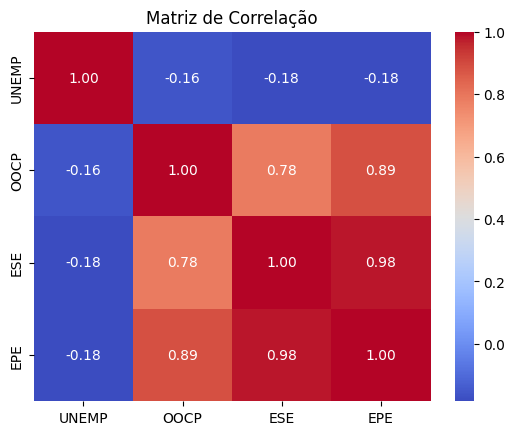

In [8]:
# Calcular a matriz de correlação sob a ótica do desemprego:
correlation_matrix_unemp = df_unemp.corr()

# Visualizar a matriz de correlação usando um mapa de calor
sns.heatmap(correlation_matrix_unemp, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Criando um modelo de regressão linear:**

In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
df

,Country Name,GDP,OOCP,ESE,EPE
0,Albania,1.321986e+10,7097,333291,195720
1,Arab World,2.889750e+12,6827541,30972246,45126932
2,United Arab Emirates,4.019580e+11,14611,411040,409776
3,Azerbaijan,7.519801e+10,22821,949294,517708
4,Burundi,3.093647e+09,69246,583308,2046794
...,...,...,...,...,...
102,Saharan Africa(IDA),1.770710e+12,34134436,56136952,158234432
103,Ukraine,1.335030e+11,56464,2713646,1685030
104,Upper middle income,2.202420e+13,8831078,201880784,206630624
105,West Bank and Gaza,1.271560e+10,32849,709226,442476


In [11]:
# Adicionando uma constante para o termo de interceptação
X = sm.add_constant(df[['ESE', 'EPE']])
y = df['GDP']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando as variáveis independentes para evitar problemas de escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e ajustando o modelo de regressão Ridge
alpha = 1.0  # Parâmetro de regularização (ajuste conforme necessário)
model = Ridge(alpha=alpha)
model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliando o desempenho do modelo

r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

R-squared on Test Set: 0.8137174247819174


**Realizando o teste de hipótese:**

O teste busca relacionar os índices educacionais com o PIB, crescimento econômico de um país.

In [12]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
df["ESE"].sort_values().quantile([0.25, 0.5, 0.75, 1])

0.25       592027.5
0.50      2670847.0
0.75     44676630.0
1.00    568015872.0
Name: ESE, dtype: float64

In [14]:
df.loc[df["ESE"] <= 592027.5, "ESE_Level"] = "baixo"
df.loc[(df["ESE"] >= 592027.5) & (df["ESE"] <= 2670847.0), "ESE_Level"] = "médio"
df.loc[(df["ESE"] >= 2670847.0) & (df["ESE"] <= 44676630.0), "ESE_Level"] = "alto"
df.loc[(df["ESE"] >= 44676630.0) & (df["ESE"] <= 568015872.0), "ESE_Level"] = "muito alto"

<ipython-input-14-483be2067914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["ESE"] <= 592027.5, "ESE_Level"] = "baixo"


In [15]:
df["EPE"].sort_values().quantile([0.25, 0.5, 0.75, 1])

0.25       479808.5
0.50      3619640.0
0.75     65868878.0
1.00    719054784.0
Name: EPE, dtype: float64

In [16]:
df.loc[df["EPE"] <= 479808.5, "EPE_Level"] = "baixo"
df.loc[(df["EPE"] >= 479808.5) & (df["EPE"] <= 3619640.0), "EPE_Level"] = "médio"
df.loc[(df["EPE"] >= 3619640.0) & (df["EPE"] <= 65868878.0), "EPE_Level"] = "alto"
df.loc[(df["EPE"] >= 65868878.0) & (df["EPE"] <= 719054784.0), "EPE_Level"] = "muito alto"

<ipython-input-16-38b57c0127d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["EPE"] <= 479808.5, "EPE_Level"] = "baixo"


In [17]:
df

,Country Name,GDP,OOCP,ESE,EPE,ESE_Level,EPE_Level
0,Albania,1.321986e+10,7097,333291,195720,baixo,baixo
1,Arab World,2.889750e+12,6827541,30972246,45126932,alto,alto
2,United Arab Emirates,4.019580e+11,14611,411040,409776,baixo,baixo
3,Azerbaijan,7.519801e+10,22821,949294,517708,médio,médio
4,Burundi,3.093647e+09,69246,583308,2046794,baixo,médio
...,...,...,...,...,...,...,...
102,Saharan Africa(IDA),1.770710e+12,34134436,56136952,158234432,muito alto,muito alto
103,Ukraine,1.335030e+11,56464,2713646,1685030,alto,médio
104,Upper middle income,2.202420e+13,8831078,201880784,206630624,muito alto,muito alto
105,West Bank and Gaza,1.271560e+10,32849,709226,442476,médio,baixo


In [18]:
# Criando a variável que armazenará uma função que me permite
# testar se há diferenças significativas entre oos GDP produzidos
# em relação às diferentes taxas de matricularização:

# A variável categórica nesse contexto será o nível de matricularização
# no nível secundário. (Depois farei o mesmo para o nível primário -
# esse foi, de início, um teste para ver se funcionava).

result = f_oneway(df["GDP"][df["ESE_Level"] == "baixo"],
                  df["GDP"][df["ESE_Level"] == "médio"],
                  df["GDP"][df["ESE_Level"] == "alto"],
                  df["GDP"][df["ESE_Level"] == "muito alto"])

In [19]:
print("Resultado do teste ANOVA:")
print("Valor-p:", result.pvalue)

Resultado do teste ANOVA:
Valor-p: 1.058305176852982e-09


O teste de hipótese se consistia em dizer de que o PIB não é influenciado pela taxa de matrícula no nível secundário (hiótese nula). Contudo, o teste do valor_p foi muito pequeno, próximo de zero, o que nos permite dizer que estasticamente, em termos gerais, há evidências significativas de a taxa de matricularização no nível secundário apresenta efeitos no PIB dos países.

In [21]:
# Criando a variável que armazenará uma função que me permite
# testar se há diferenças significativas entre oos GDP produzidos
# em relação às diferentes taxas de matricularização:

# A variável categórica nesse contexto será o nível de matricularização
# no nível primário.

result_EPE = f_oneway(df["GDP"][df["EPE_Level"] == "baixo"],
                  df["GDP"][df["EPE_Level"] == "médio"],
                  df["GDP"][df["EPE_Level"] == "alto"],
                  df["GDP"][df["EPE_Level"] == "muito alto"])

In [22]:
# Passo 4: Analisar os Resultados do Teste de ANOVA
print("Resultado do teste ANOVA:")
print("Valor-p:", result_EPE.pvalue)

Resultado do teste ANOVA:
Valor-p: 1.7774133115659263e-07


O teste de hipótese se consistia em dizer de que o PIB não é influenciado pela taxa de matrícula no nível primário (hiótese nula). Contudo, o teste do valor_p foi muito pequeno, próximo de zero, o que nos permite dizer que estasticamente, em termos gerais, há evidências significativas de a taxa de matricularização no nível primário apresenta efeitos no PIB dos países.

In [23]:
# Quero, ainda, relacionar o PIB com a taxa de evasão escolar,
# como forma de aferir se há ou não uma relação. Para tanto,
# além da matriz de correlação, farei um teste de hipótese.
# Se não aprsentar alguma relação signigicativa, o valor-p
# deverá estar acima de 5% ou próximo desse.

# Para tanto, vamos:

df["OOCP"].sort_values().quantile([0.25, 0.5, 0.75, 1])

0.25       15124.5
0.50      257525.0
0.75     4509864.5
1.00    60943456.0
Name: OOCP, dtype: float64

In [24]:
df.loc[df["OOCP"] <= 15124.5, "OOCP_Level"] = "baixo"
df.loc[(df["OOCP"] >= 15124.5) & (df["OOCP"] <= 257525.0), "OOCP_Level"] = "médio"
df.loc[(df["OOCP"] >= 257525.0) & (df["OOCP"] <= 4509864.5), "OOCP_Level"] = "alto"
df.loc[(df["OOCP"] >= 4509864.5) & (df["OOCP"] <= 60943456.0), "OOCP_Level"] = "muito alto"

<ipython-input-24-bd5ea66e6ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["OOCP"] <= 15124.5, "OOCP_Level"] = "baixo"


In [25]:
df

,Country Name,GDP,OOCP,ESE,EPE,ESE_Level,EPE_Level,OOCP_Level
0,Albania,1.321986e+10,7097,333291,195720,baixo,baixo,baixo
1,Arab World,2.889750e+12,6827541,30972246,45126932,alto,alto,muito alto
2,United Arab Emirates,4.019580e+11,14611,411040,409776,baixo,baixo,baixo
3,Azerbaijan,7.519801e+10,22821,949294,517708,médio,médio,médio
4,Burundi,3.093647e+09,69246,583308,2046794,baixo,médio,médio
...,...,...,...,...,...,...,...,...
102,Saharan Africa(IDA),1.770710e+12,34134436,56136952,158234432,muito alto,muito alto,muito alto
103,Ukraine,1.335030e+11,56464,2713646,1685030,alto,médio,médio
104,Upper middle income,2.202420e+13,8831078,201880784,206630624,muito alto,muito alto,muito alto
105,West Bank and Gaza,1.271560e+10,32849,709226,442476,médio,baixo,médio


In [26]:
# Criando a variável que armazenará uma função que me permite
# testar se há diferenças significativas entre oos GDP produzidos
# em relação às diferentes taxas de evasão escolar:

# A variável categórica nesse contexto será o nível de evasão escolar.

result_OOCP = f_oneway(df["GDP"][df["OOCP_Level"] == "baixo"],
                  df["GDP"][df["OOCP_Level"] == "médio"],
                  df["GDP"][df["OOCP_Level"] == "alto"],
                  df["GDP"][df["OOCP_Level"] == "muito alto"])

In [27]:
# Passo 4: Analisar os Resultados do Teste de ANOVA
print("Resultado do teste ANOVA:")
print("Valor-p:", result_OOCP.pvalue)

Resultado do teste ANOVA:
Valor-p: 0.00041595396349947594


O teste de hipótese se consistia em dizer de que o PIB não é influenciado taxa evasão escolar (hiótese nula). Contudo, o teste do valor_p foi próximo de zero, o que nos permite dizer que estasticamente, em termos gerais, há evidências significativas de que a respectiva taxa apresenta efeitos no PIB dos países.

**Conclusão dos testes de hipótese:**




Conclui-se que, por meio dos testes de hipótese, há uma relação, com significância estatística, entre as taxas de matricularização nos níveis primários e secundários, respectivamente, e a taxa de evasão escolar em relação ao PIB dos países. O que significa dizer que o PIB dos países é influenciado pelo nível de educação de seus cidadãoa, sendo as matrículas tanto no nível primário quanto secundário variáveis que influem positivamente, enquanto que a taxa de evasão escolar aquela que influe negativamente.

Por outro lado, há algo interessante, que corrobora aquilo que fora encontrado pela matriz de correlação: cada qual das taxas, quer seja de matricularização primária ou secundária, bem como a de evasão apresentam uma contribuição diferente, sendo essa demarcada pelo valor-p, o quão menor era em relação a cada uma. Nesse sentido, aquela que possuia maior relação era, respectivamente, taxa de matricularização secundária, primáira e, por fim, taxa de evasão escolar.

**Colocando os testes de hipótese em termos gráficos:**

Para ESE:

Rejeitar a hipótese nula. Há evidências de diferença significativa nos PIB's mediante a taxa de matricularização no níve secundário.

Resultados do teste de Tukey:
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
  group1     group2         meandiff      p-adj         lower              upper        reject
----------------------------------------------------------------------------------------------
      alto      baixo -2404182901177.8145 0.7959   -9251978356602.35  4443612554246.721  False
      alto muito alto  14278758381428.965    0.0   7430962926004.431   21126553836853.5   True
      alto      médio -2326588879035.0225 0.8158  -9239914970672.832  4586737212602.786  False
     baixo muito alto  16682941282606.781    0.0   9835145827182.244 23530736738031.312   True
     baixo      médio     77594022142.792    1.0  -6835732069495.017  6990920113780.601  False
muito alto      médio -16605347260463.986    0.0 -23518673352101.797 -969202

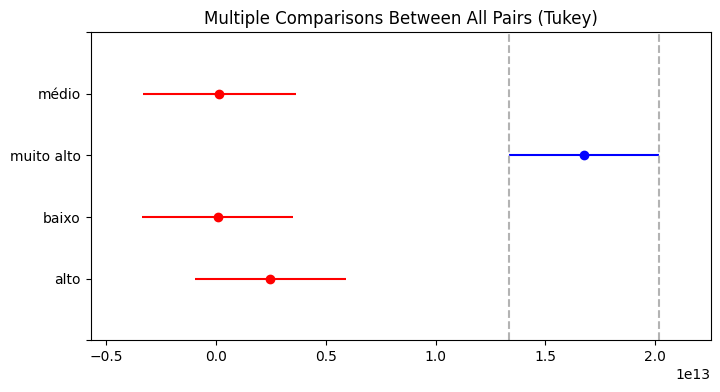

In [28]:
# Verificar se o valor-p é menor que o nível de significância (por exemplo, 0.05)
if result.pvalue < 0.05:
    print("Rejeitar a hipótese nula. Há evidências de diferença significativa nos PIB's mediante a taxa de matricularização no níve secundário.")

    # Passo 5: Realizar Testes Post Hoc (Teste de Tukey)
    tukey_results = pairwise_tukeyhsd(df['GDP'], df['ESE_Level'])

    print("\nResultados do teste de Tukey:")
    print(tukey_results)

    # Visualizar os resultados do teste de Tukey
    tukey_results.plot_simultaneous(comparison_name='muito alto', figsize=(8, 4))
    plt.show()
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.")

Para EPE:

Rejeitar a hipótese nula. Há evidências de diferença significativa nos PIB's mediante a taxa de matricularização no níve primário.

Resultados do teste de Tukey:
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
  group1     group2         meandiff      p-adj         lower              upper        reject
----------------------------------------------------------------------------------------------
      alto      baixo -3627483052273.7407 0.5556 -10831786399442.318 3576820294894.8374  False
      alto muito alto  11628542585843.371 0.0003   4424239238674.793  18832845933011.95   True
      alto      médio  -3371485417946.633 0.6216  -10644731037834.44  3901760201941.174  False
     baixo muito alto  15256025638117.111    0.0   8051722290948.533 22460328985285.688   True
     baixo      médio   255997634327.1083 0.9997  -7017247985560.698  7529243254214.915  False
muito alto      médio -15000028003790.004    0.0  -22273273623677.81 -77267823

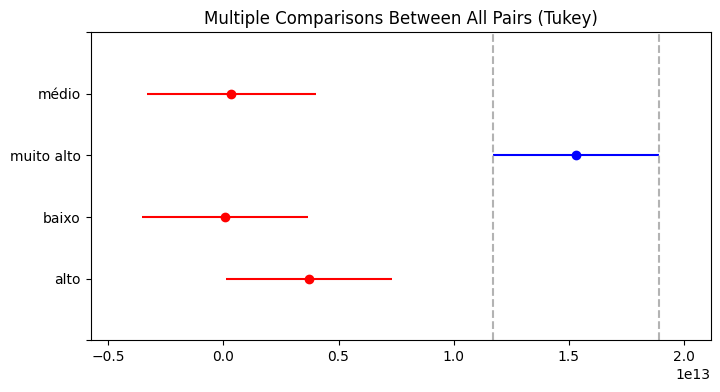

In [29]:
# Verificar se o valor-p é menor que o nível de significância (por exemplo, 0.05)
if result_EPE.pvalue < 0.05:
    print("Rejeitar a hipótese nula. Há evidências de diferença significativa nos PIB's mediante a taxa de matricularização no níve primário.")

    # Passo 5: Realizar Testes Post Hoc (Teste de Tukey)
    tukey_results = pairwise_tukeyhsd(df['GDP'], df['EPE_Level'])

    print("\nResultados do teste de Tukey:")
    print(tukey_results)

    # Visualizar os resultados do teste de Tukey
    tukey_results.plot_simultaneous(comparison_name='muito alto', figsize=(8, 4))
    plt.show()
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.")

Para OOCP:

Rejeitar a hipótese nula. Há evidências de diferença significativa nos PIB's mediante a taxa de evasão escolar.

Resultados do teste de Tukey:
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
  group1     group2         meandiff      p-adj         lower              upper        reject
----------------------------------------------------------------------------------------------
      alto      baixo  -6299693074263.814  0.156 -14087045963972.441 1487659815444.8135  False
      alto muito alto   5198371453343.964 0.3069  -2588981436364.664 12985724343052.592  False
      alto      médio  -5774038291405.259 0.2269  -13635913002421.45  2087836419610.931  False
     baixo muito alto  11498064527607.777 0.0011  3710711637899.1494 19285417417316.406   True
     baixo      médio   525654782858.5555 0.9981  -7336219928157.634  8387529493874.745  False
muito alto      médio -10972409744749.223 0.0023 -18834284455765.414 -3110535033733.033   True
--

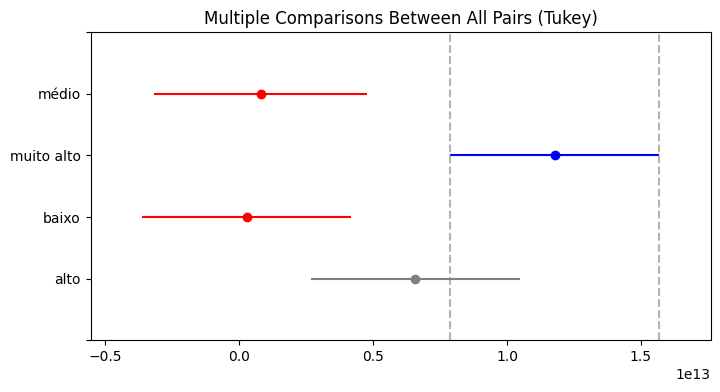

In [30]:
# Verificar se o valor-p é menor que o nível de significância (por exemplo, 0.05)
if result_OOCP.pvalue < 0.05:
    print("Rejeitar a hipótese nula. Há evidências de diferença significativa nos PIB's mediante a taxa de evasão escolar.")

    # Passo 5: Realizar Testes Post Hoc (Teste de Tukey)
    tukey_results = pairwise_tukeyhsd(df['GDP'], df['OOCP_Level'])

    print("\nResultados do teste de Tukey:")
    print(tukey_results)

    # Visualizar os resultados do teste de Tukey
    tukey_results.plot_simultaneous(comparison_name='muito alto', figsize=(8, 4))
    plt.show()
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.")

**Testes de intervalo de confiança:**

Para ESE:

In [31]:
import scipy.stats as stats
import statsmodels.api as sm

# Criando  variáveis que irão me permitir realizar o intervalo de confiança:

baixo = df["GDP"][df["ESE_Level"] == "baixo"]
medio = df["GDP"][df["ESE_Level"] == "médio"]
alto = df["GDP"][df["ESE_Level"] == "alto"]
muito_alto = df["GDP"][df["ESE_Level"] == "muito alto"]

# Calculando as médias e desvios padrãos para cada grupo:

means = [baixo.mean(), medio.mean(), alto.mean(), muito_alto.mean()]
std_devs = [baixo.std(), medio.std(), alto.std(), muito_alto.std()]

# Calculando o tamanho das amostras para cada grupo:

nobs = [len(baixo), len(medio), len(alto), len(muito_alto)]

# Calculando a média global e o desvio padrão global:

global_mean = np.mean(df["GDP"])
global_std_dev = np.std(df["GDP"])

# Calculando o erro padrão da diferença entre as médias:

standard_errors = [global_std_dev * np.sqrt(1 / nobs[i] + 1 / len(df["GDP"])) for i in range(4)]


In [32]:
# Calculando o intervalo de confiança:

conf_ints = [stats.t.interval(0.95, len(df["GDP"]) - 1, loc=means[i] - global_std_dev, scale=standard_errors[i]) for i in range(4)]

In [33]:
# Exibe os resultados
for i in range(4):
    print(f"Intervalo de Confiança para a diferença entre a média de {df['ESE_Level'].unique()[i]} e a média global: {conf_ints[i]}")

Intervalo de Confiança para a diferença entre a média de baixo e a média global: (-16674476274463.727, -6654744419413.862)
Intervalo de Confiança para a diferença entre a média de alto e a média global: (-16673231542892.902, -6500801106699.102)
Intervalo de Confiança para a diferença entre a média de médio e a média global: (-14270293373285.914, -4250561518236.048)
Intervalo de Confiança para a diferença entre a média de muito alto e a média global: (8465008143.051758, 10028196863192.918)


Para EPE:

In [34]:
baixo = df["GDP"][df["EPE_Level"] == "baixo"]
medio = df["GDP"][df["EPE_Level"] == "médio"]
alto = df["GDP"][df["EPE_Level"] == "alto"]
muito_alto = df["GDP"][df["EPE_Level"] == "muito alto"]

# Calculando as médias e desvios padrãos para cada grupo:

means = [baixo.mean(), medio.mean(), alto.mean(), muito_alto.mean()]
std_devs = [baixo.std(), medio.std(), alto.std(), muito_alto.std()]

# Calculando o tamanho das amostras para cada grupo:

nobs = [len(baixo), len(medio), len(alto), len(muito_alto)]

# Calculando a média global e o desvio padrão global:

global_mean = np.mean(df["GDP"])
global_std_dev = np.std(df["GDP"])

# Calculando o erro padrão da diferença entre as médias:

standard_errors = [global_std_dev * np.sqrt(1 / nobs[i] + 1 / len(df["GDP"])) for i in range(4)]

# Calculando o intervalo de confiança:

conf_ints = [stats.t.interval(0.95, len(df["GDP"]) - 1, loc=means[i] - global_std_dev, scale=standard_errors[i]) for i in range(4)]

# Exibe os resultados
for i in range(4):
    print(f"Intervalo de Confiança para a diferença entre a média de {df['EPE_Level'].unique()[i]} e a média global: {conf_ints[i]}")

Intervalo de Confiança para a diferença entre a média de baixo e a média global: (-16666447074418.504, -6646715219368.64)
Intervalo de Confiança para a diferença entre a média de alto e a média global: (-16486798730663.363, -6314368294469.5625)
Intervalo de Confiança para a diferença entre a média de médio e a média global: (-13038964022144.764, -3019232167094.8984)
Intervalo de Confiança para a diferença entre a média de muito alto e a média global: (-1410421436301.3936, 8609310418748.472)


Para OOCP:


In [35]:
baixo = df["GDP"][df["OOCP_Level"] == "baixo"]
medio = df["GDP"][df["OOCP_Level"] == "médio"]
alto = df["GDP"][df["OOCP_Level"] == "alto"]
muito_alto = df["GDP"][df["OOCP_Level"] == "muito alto"]

# Calculando as médias e desvios padrãos para cada grupo:

means = [baixo.mean(), medio.mean(), alto.mean(), muito_alto.mean()]
std_devs = [baixo.std(), medio.std(), alto.std(), muito_alto.std()]

# Calculando o tamanho das amostras para cada grupo:

nobs = [len(baixo), len(medio), len(alto), len(muito_alto)]

# Calculando a média global e o desvio padrão global:

global_mean = np.mean(df["GDP"])
global_std_dev = np.std(df["GDP"])

# Calculando o erro padrão da diferença entre as médias:

standard_errors = [global_std_dev * np.sqrt(1 / nobs[i] + 1 / len(df["GDP"])) for i in range(4)]

# Calculando o intervalo de confiança:

conf_ints = [stats.t.interval(0.95, len(df["GDP"]) - 1, loc=means[i] - global_std_dev, scale=standard_errors[i]) for i in range(4)]

# Exibe os resultados
for i in range(4):
    print(f"Intervalo de Confiança para a diferença entre a média de {df['OOCP_Level'].unique()[i]} e a média global: {conf_ints[i]}")

Intervalo de Confiança para a diferença entre a média de baixo e a média global: (-16457996667612.875, -6438264812563.009)
Intervalo de Confiança para a diferença entre a média de muito alto e a média global: (-16008691175326.287, -5836260739132.486)
Intervalo de Confiança para a diferença entre a média de médio e a média global: (-10158303593349.06, -138571738299.1953)
Intervalo de Confiança para a diferença entre a média de alto e a média global: (-4959932140005.097, 5059799715044.769)
